In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import catboost

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [3]:
# display the train data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [4]:
# display the test data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

In [5]:
# display the whole columns avialiable
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [6]:
# display the whole columns avialiable
test_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers'],
      dtype='object')

In [7]:
train_data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


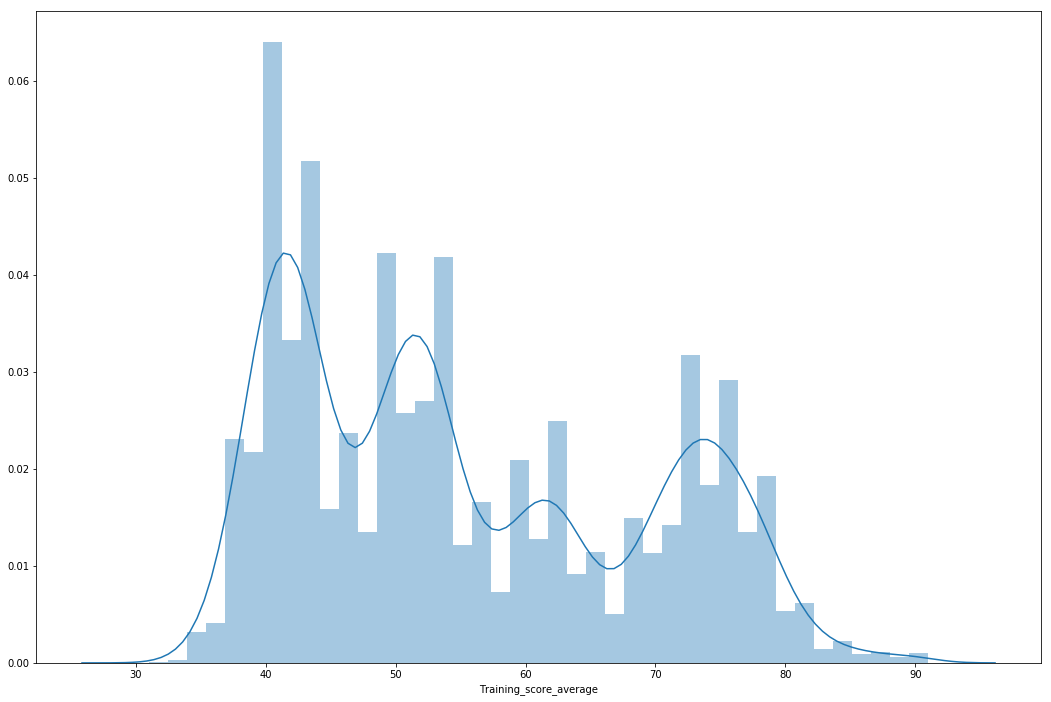

In [8]:
#f,ax = plt.Subplot(figsize = (18,12))
f,ax=plt.subplots(figsize=(18,12))
sns.distplot(train_data['Training_score_average'], hist = True, kde = True,ax = ax)


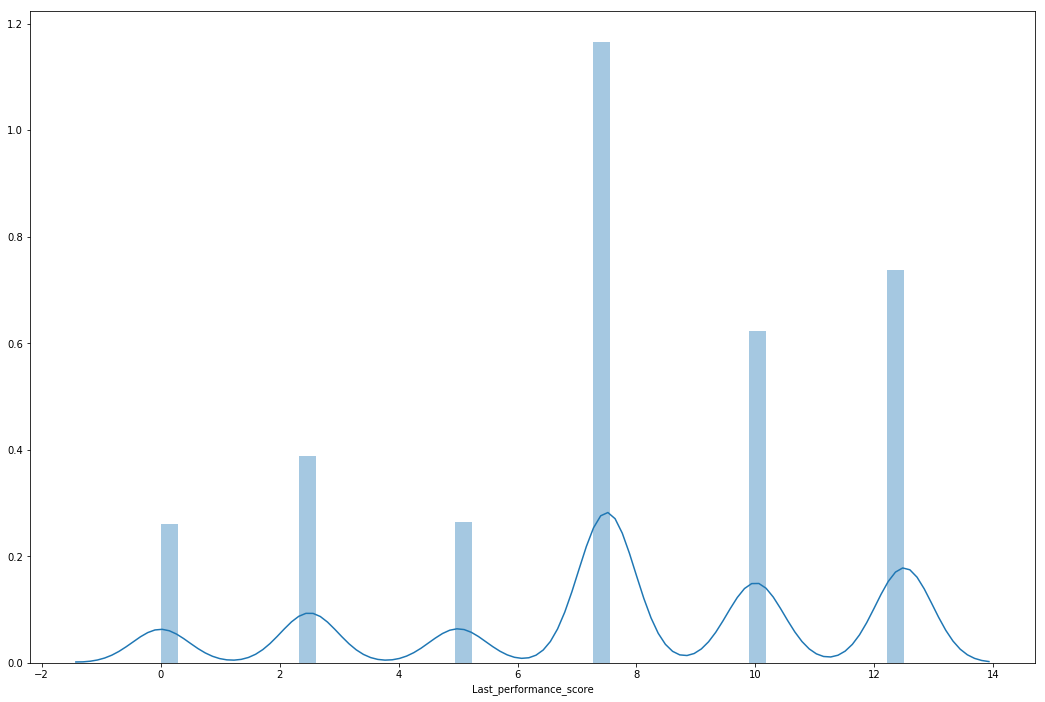

In [9]:
f,ax=plt.subplots(figsize=(18,12))
sns.distplot(train_data['Last_performance_score'], hist = True, kde = True,ax = ax)

In [10]:
# display the shape of train data
train_data.shape

(38312, 19)

In [11]:
#shape of test data
test_data.shape 

(16496, 18)

In [12]:
# display the first 499 rows of observations
train_data.head(500)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0
5,YAK/S/00007,Customer Support and Field Operations,First Degree or HND,Female,Agency and others,2,1990,7.5,2014,0,0,51,ENUGU,Yes,Married,No,Yes,1,0
6,YAK/S/00008,Customer Support and Field Operations,"MSc, MBA and PhD",Male,Direct Internal process,2,1988,7.5,2013,0,0,55,OYO,No,Single,No,No,1,0
7,YAK/S/00009,Information and Strategy,First Degree or HND,Male,Agency and others,2,1993,10.0,2014,0,0,75,LAGOS,Yes,Married,No,No,0,0
8,YAK/S/00010,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Direct Internal process,2,1989,12.5,2014,1,0,46,ONDO,Yes,Married,No,No,0,0
9,YAK/S/00012,Commercial Sales and Marketing,First Degree or HND,Female,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,Yes,Married,No,No,0,1


In [13]:
#train_data.State_Of_Origin.value_counts()

In [14]:
#train_data.Year_of_recruitment.value_counts()

In [15]:
#train_data.Division.value_counts()

In [16]:
#train_data.Trainings_Attended.value_counts()

In [17]:
#train_data.Qualification.value_counts()

In [18]:
col = train_data [['Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
                    'Last_performance_score', 'Year_of_recruitment', 'Targets_met','Previous_Award','Training_score_average',
                 'State_Of_Origin','Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
                'Previous_IntraDepartmental_Movement','No_of_previous_employers','Promoted_or_Not']]
  





test_col =  test_data [['Division', 'Qualification', 'Gender','Channel_of_Recruitment', 'Trainings_Attended', 
                        'Year_of_birth','Last_performance_score', 'Year_of_recruitment', 'Targets_met', 'Previous_Award', 
                        'Training_score_average', 'State_Of_Origin','Foreign_schooled', 'Marital_Status',
                        'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement', 'No_of_previous_employers']]


''' numeric_col = train_data[['Last_performance_score','Training_score_average','Trainings_Attended',
                         'Targets_met',]] '''

" numeric_col = train_data[['Last_performance_score','Training_score_average','Trainings_Attended',\n                         'Targets_met',]] "

In [19]:

def freq_table(data,x):
    for i in x:
        print('frequency Table of\t'+i)
        print( data[i].value_counts())
        print('\n')


In [20]:
# frequency table of the parse train_data columns
freq_table(train_data,col)

frequency Table of	Division
Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64


frequency Table of	Qualification
First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64


frequency Table of	Gender
Male      26880
Female    11432
Name: Gender, dtype: int64


frequency Table of	Channel_of_Recruitment
Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int6

In [21]:
# frequency table of the parse test_data columns
freq_table(test_data,test_col)

frequency Table of	Division
Commercial Sales and Marketing                 5145
Customer Support and Field Operations          3375
Information Technology and Solution Support    2186
Sourcing and Purchasing                        2086
Information and Strategy                       1631
Business Finance Operations                     750
People/HR Management                            714
Regulatory and Legal services                   306
Research and Innovation                         303
Name: Division, dtype: int64


frequency Table of	Qualification
First Degree or HND         11091
MSc, MBA and PhD             4456
Non-University Education      219
Name: Qualification, dtype: int64


frequency Table of	Gender
Male      11616
Female     4880
Name: Gender, dtype: int64


frequency Table of	Channel_of_Recruitment
Agency and others                  9136
Direct Internal process            7026
Referral and Special candidates     334
Name: Channel_of_Recruitment, dtype: int64


frequenc

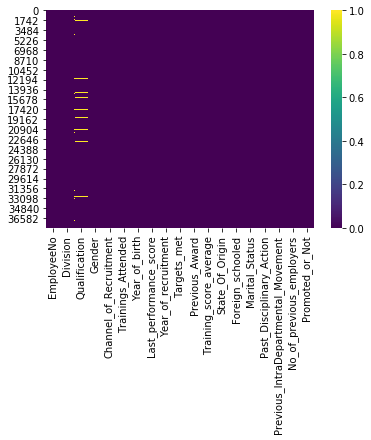

In [22]:
# visualization of the missing train-data
sns.heatmap(data=train_data.isnull(), cmap='viridis')

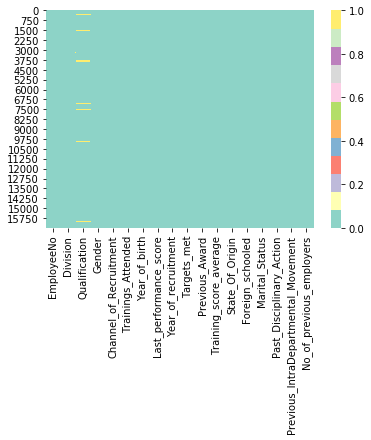

In [23]:
# visualization of the missing test-data
sns.heatmap(data = test_data.isnull(), cmap ='Set3')

In [24]:
# train data Stat info
train_data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [25]:
# test data Stat info
test_data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average
count,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2.251455,1986.161130,7.692016,2013.122393,0.349600,0.023218,55.433863
std,0.608865,7.708188,3.734303,4.273649,0.476858,0.150599,13.392306
min,2.000000,1958.000000,0.000000,1986.000000,0.000000,0.000000,31.000000
25%,2.000000,1982.000000,5.000000,2011.000000,0.000000,0.000000,43.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000


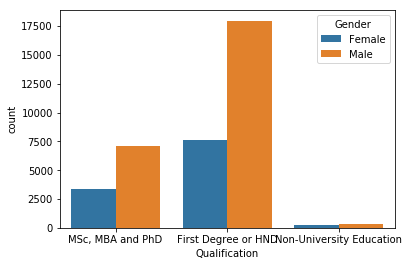

In [26]:

sns.countplot('Qualification',hue='Gender',data=train_data)

there are many male with degrees than female
and ther are more male with no University education than Females

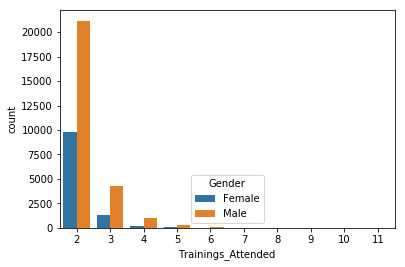

In [27]:
sns.countplot('Trainings_Attended',hue='Gender', data = train_data)

males attend more trainnings than Females


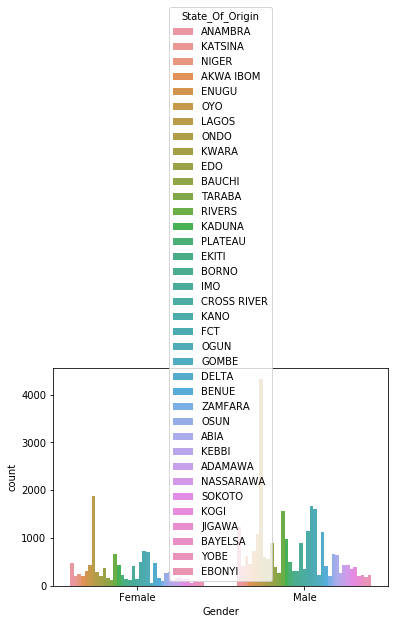

In [28]:
sns.countplot('Gender',hue='State_Of_Origin', data =train_data)

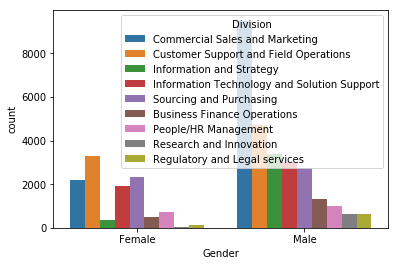

In [29]:
sns.countplot('Gender',hue='Division', data=train_data)

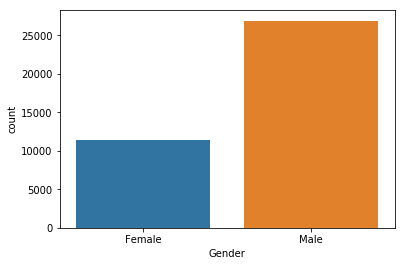

In [30]:
sns.countplot('Gender',data=train_data)

Males are > than Females

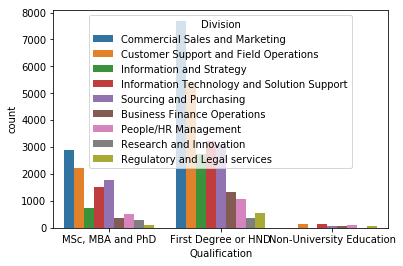

In [31]:
sns.countplot('Qualification',hue='Division', data=train_data)

people with First Degree or HND are more than people with advance Degrees


In [32]:
''' CREATION OF A COUNTPLOT FUNCTION TO HELP IN VISUALIZATION OF VARIOUS FEATURES'''
def CountPlot_func(data,columns,Hue):
    for column in columns:
        print(column+'\tcountplot')
        sns.countplot(column,hue=Hue,data = data)
        print('\n')

In [33]:
#CountPlot_func(col, 'Gender', train_data)

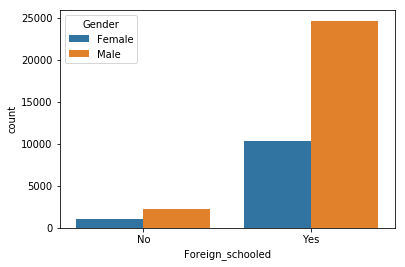

In [34]:
sns.countplot('Foreign_schooled',hue='Gender', data = train_data)

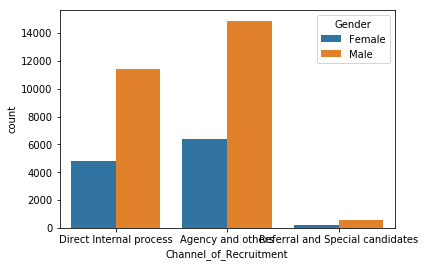

In [35]:
#ax = plt.figure(figsize=(360,2160))
sns.countplot('Channel_of_Recruitment', hue='Gender', data = train_data)

In [36]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [37]:
'''train_data['birth_date'] = pd.to_datetime(train_data['Year_of_birth'], infer_datetime_format = True)
train_data['year'] = train_data['birth_date'].dt.year
train_data['Age'] =1998-train_data['year']'''

"train_data['birth_date'] = pd.to_datetime(train_data['Year_of_birth'], infer_datetime_format = True)\ntrain_data['year'] = train_data['birth_date'].dt.year\ntrain_data['Age'] =1998-train_data['year']"

In [38]:
#train_data.drop(['birth_date','year','Age','work_year','Wyear','No_Year_@Work'], axis = 1, inplace = True)

In [39]:
#train_data

In [40]:
train_data['Age'] = 2019-train_data['Year_of_birth']
train_data['Years_@Work'] = 2019 - train_data['Year_of_recruitment']


test_data['Age'] = 2019-test_data['Year_of_birth']
test_data['Years_@Work'] = 2019 - test_data['Year_of_recruitment']




''' #######################################################################################
    #  TREATING THE MISSING THE VALUES WITH                                               #
    #                                                                                     #
    #                                                                                     #
    #                                                                                     #
    ####################################################################################### 
'''

In [41]:
train_data["Qualification"].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [42]:
test_data["Qualification"].value_counts()

First Degree or HND         11091
MSc, MBA and PhD             4456
Non-University Education      219
Name: Qualification, dtype: int64

In [43]:
train_data['Qualification'].fillna('First Degree or HND', inplace = True)
test_data['Qualification'].fillna('First Degree or HND', inplace = True)


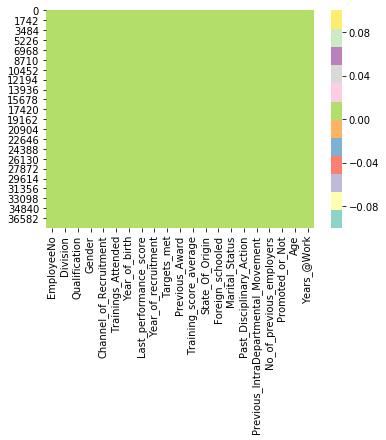

In [44]:
sns.heatmap(data = train_data.isnull(), cmap = 'Set3')

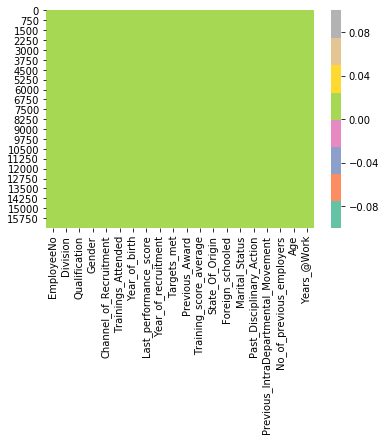

In [45]:
sns.heatmap(data = test_data.isnull(), cmap='Set2')

creat another observation named cardinal point and categories the states under the cardinal point


In [46]:
train_data['State_Of_Origin'].value_counts()

LAGOS          6204
FCT            2389
OGUN           2302
RIVERS         2222
ANAMBRA        1710
KANO           1649
DELTA          1594
OYO            1508
KADUNA         1399
IMO            1307
EDO            1259
ENUGU          1025
ABIA            950
OSUN            929
ONDO            875
NIGER           857
KWARA           765
PLATEAU         739
AKWA IBOM       673
NASSARAWA       632
KATSINA         615
ADAMAWA         605
BENUE           579
BAUCHI          557
KOGI            542
SOKOTO          499
CROSS RIVER     495
EKITI           455
BORNO           447
TARABA          400
KEBBI           393
BAYELSA         324
EBONYI          313
GOMBE           291
ZAMFARA         290
JIGAWA          262
YOBE            257
Name: State_Of_Origin, dtype: int64

In [47]:
test_data['State_Of_Origin'].value_counts()

LAGOS          2755
OGUN            998
FCT             955
RIVERS          944
ANAMBRA         767
KANO            718
DELTA           681
OYO             646
KADUNA          633
IMO             561
EDO             499
ENUGU           473
ABIA            411
NIGER           410
OSUN            406
ONDO            383
KWARA           366
PLATEAU         301
KATSINA         265
BENUE           263
NASSARAWA       257
ADAMAWA         252
AKWA IBOM       234
KOGI            229
BAUCHI          226
CROSS RIVER     219
SOKOTO          213
EKITI           206
BORNO           177
KEBBI           163
TARABA          150
BAYELSA         140
YOBE            136
EBONYI          123
GOMBE           115
JIGAWA          112
ZAMFARA         109
Name: State_Of_Origin, dtype: int64

In [48]:
train_data['Origin_State'] =train_data['State_Of_Origin']
train_data.head()

test_data['Origin_State'] = test_data['State_Of_Origin']
test_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Age,Years_@Work,Origin_State
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,...,65,FCT,Yes,Married,No,No,1,43,2,FCT
1,YAK/S/00011,Information Technology and Solution Support,First Degree or HND,Male,Direct Internal process,2,1991,0.0,2018,0,...,69,OGUN,Yes,Married,No,No,1,28,1,OGUN
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,...,76,KANO,Yes,Married,No,No,1,35,7,KANO
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,...,52,RIVERS,No,Single,No,No,1,35,10,RIVERS
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,...,69,FCT,Yes,Married,No,No,0,36,5,FCT


In [49]:

train_cardinal = {'LAGOS':'West','OGUN':'West', 'OYO':'West','ONDO':'West', 'OSUN':'West', 'EKITI':'West','KWARA':'West', 'EDO':'West',
        'RIVERS':'South','ANAMBRA':'South','IMO':'South', 'DELTA':'South', 'ENUGU':'South', 'ABIA':'South', 'CROSS RIVER':'South','KOGI':'South','BENUE':'South', 'BAYELSA':'South','NIGER':'South', 'EBONYI':'South','AKWA IBOM':'South',
        'KANO':'North', 'KADUNA':'North', 'NASSARAWA':'North', 'KATSINA':'North','SOKOTO':'North', 'KEBBI':'North','ZAMFARA':'North', 'JIGAWA':'North', 'BAUCHI':'North',
        'PLATEAU':'East','ADAMAWA':'East','BORNO':'East','TARABA':'East', 'GOMBE':'East','YOBE':'East',
        'FCT':'Abuja'}
        
train_data['Origin_State'] = [train_cardinal[x] for x in train_data['Origin_State']]


test_cardinal = {'LAGOS':'West','OGUN':'West', 'OYO':'West','ONDO':'West', 'OSUN':'West', 'EKITI':'West','KWARA':'West', 'EDO':'West',
        'RIVERS':'South','ANAMBRA':'South','IMO':'South', 'DELTA':'South', 'ENUGU':'South', 'ABIA':'South', 'CROSS RIVER':'South','KOGI':'South','BENUE':'South', 'BAYELSA':'South','NIGER':'South', 'EBONYI':'South','AKWA IBOM':'South',
        'KANO':'North', 'KADUNA':'North', 'NASSARAWA':'North', 'KATSINA':'North','SOKOTO':'North', 'KEBBI':'North','ZAMFARA':'North', 'JIGAWA':'North', 'BAUCHI':'North',
        'PLATEAU':'East','ADAMAWA':'East','BORNO':'East','TARABA':'East', 'GOMBE':'East','YOBE':'East',
        'FCT':'Abuja'}

test_data['Origin_State'] = [test_cardinal[u] for u in test_data['Origin_State'] ]


In [50]:
train_data['Origin_State'].value_counts()

West     14297
South    12591
North     6296
East      2739
Abuja     2389
Name: Origin_State, dtype: int64

In [51]:
test_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'Origin_State'],
      dtype='object')

In [52]:
#test_data['Origin_State'] = test_data['State_Of_Origin']

In [53]:
'''
test_cardinal = {'LAGOS':'West','OGUN':'West', 'OYO':'West','ONDO':'West', 'OSUN':'West', 'EKITI':'West','KWARA':'West', 'EDO':'West',
        'RIVERS':'South','ANAMBRA':'South','IMO':'South', 'DELTA':'South', 'ENUGU':'South', 'ABIA':'South', 'CROSS RIVER':'South','KOGI':'South','BENUE':'South', 'BAYELSA':'South','NIGER':'South', 'EBONYI':'South','AKWA IBOM':'South',
        'KANO':'North', 'KADUNA':'North', 'NASSARAWA':'North', 'KATSINA':'North','SOKOTO':'North', 'KEBBI':'North','ZAMFARA':'North', 'JIGAWA':'North', 'BAUCHI':'North',
        'PLATEAU':'East','ADAMAWA':'East','BORNO':'East','TARABA':'East', 'GOMBE':'East','YOBE':'East',
        'FCT':'Abuja'}

test_data['Origin_State'] = [test_cardinal[u] for u in test_data['Origin_State']]
'''

"\ntest_cardinal = {'LAGOS':'West','OGUN':'West', 'OYO':'West','ONDO':'West', 'OSUN':'West', 'EKITI':'West','KWARA':'West', 'EDO':'West',\n        'RIVERS':'South','ANAMBRA':'South','IMO':'South', 'DELTA':'South', 'ENUGU':'South', 'ABIA':'South', 'CROSS RIVER':'South','KOGI':'South','BENUE':'South', 'BAYELSA':'South','NIGER':'South', 'EBONYI':'South','AKWA IBOM':'South',\n        'KANO':'North', 'KADUNA':'North', 'NASSARAWA':'North', 'KATSINA':'North','SOKOTO':'North', 'KEBBI':'North','ZAMFARA':'North', 'JIGAWA':'North', 'BAUCHI':'North',\n        'PLATEAU':'East','ADAMAWA':'East','BORNO':'East','TARABA':'East', 'GOMBE':'East','YOBE':'East',\n        'FCT':'Abuja'}\n\ntest_data['Origin_State'] = [test_cardinal[u] for u in test_data['Origin_State']]\n"

In [54]:
test_data['Origin_State'].value_counts()

West     6259
South    5455
North    2696
East     1131
Abuja     955
Name: Origin_State, dtype: int64

In [55]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age', 'Years_@Work', 'Origin_State'],
      dtype='object')

In [56]:
train_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Years_@Work,Origin_State
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,ANAMBRA,No,Married,No,No,0,0,33,8,South
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,ANAMBRA,Yes,Married,No,No,0,0,28,4,South
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,KATSINA,Yes,Married,No,No,0,0,32,7,North
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,NIGER,Yes,Single,No,No,1,0,37,10,South
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,AKWA IBOM,Yes,Married,No,No,1,0,29,7,South


In [57]:
train_data['State_Cardinal_point'] =  train_data['Origin_State']

test_data['State_Cardinal_point'] = test_data['Origin_State']

In [58]:
train_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Years_@Work,Origin_State,State_Cardinal_point
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,No,Married,No,No,0,0,33,8,South,South
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,Married,No,No,0,0,28,4,South,South
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,Married,No,No,0,0,32,7,North,North
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,Yes,Single,No,No,1,0,37,10,South,South
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,Yes,Married,No,No,1,0,29,7,South,South


In [59]:
train_data.drop('Origin_State', axis = 1, inplace =True)

test_data.drop('Origin_State', axis = 1, inplace = True)

In [60]:
train_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Years_@Work,State_Cardinal_point
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,...,ANAMBRA,No,Married,No,No,0,0,33,8,South
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,...,ANAMBRA,Yes,Married,No,No,0,0,28,4,South
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,...,KATSINA,Yes,Married,No,No,0,0,32,7,North
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,...,NIGER,Yes,Single,No,No,1,0,37,10,South
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,...,AKWA IBOM,Yes,Married,No,No,1,0,29,7,South


Text(0.5, 1.0, 'Correlation Matrix')

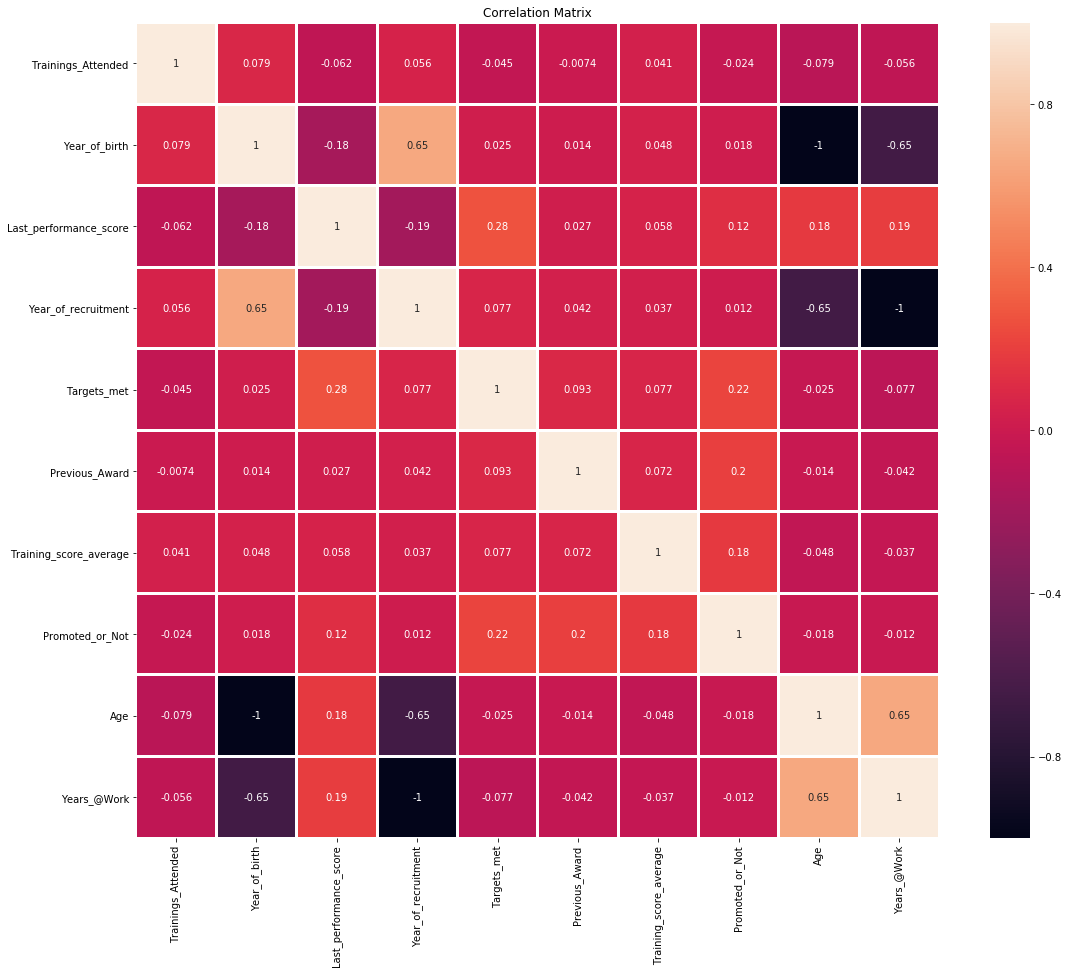

In [61]:

f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(train_data.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [62]:
train_data.shape

(38312, 22)

In [63]:
test_data.shape

(16496, 21)

In [64]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age', 'Years_@Work', 'State_Cardinal_point'],
      dtype='object')

In [65]:
test_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'State_Cardinal_point'],
      dtype='object')

In [66]:
train_data.shape

(38312, 22)

In [67]:

train_categorical_cols=['Division', 'Qualification','Gender','Channel_of_Recruitment',
            'State_Of_Origin','Foreign_schooled','Marital_Status',   
            'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement','State_Cardinal_point']

train_data = pd.get_dummies(train_data, columns= train_categorical_cols)

train_data.shape





(38312, 80)

In [68]:
test_categorical_cols = ['Division', 'Qualification','Gender','Channel_of_Recruitment',
            'State_Of_Origin','Foreign_schooled','Marital_Status',   
            'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement','State_Cardinal_point']



test_data = pd.get_dummies(test_data, columns= test_categorical_cols)
test_data.shape

(16496, 79)

# Feature Selection

In [69]:
train_data['target_label'] = train_data['Promoted_or_Not']

In [70]:
train_data.drop('Promoted_or_Not', axis =1, inplace = True)

In [71]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'State_

In [72]:
train_data.shape

(38312, 80)

In [73]:
###### APPROPRITION OF VARIBALE NAME IN TRAIN DATA   #######
######                                               ######
#DIVISION
train_data['Commercial Sales and Marketing'] = train_data['Division_Commercial Sales and Marketing']
train_data['Customer Support and Field Operations'] = train_data['Division_Customer Support and Field Operations']
train_data['Information Technology and Solution Support'] = train_data['Division_Information Technology and Solution Support']
train_data['Information and Strategy'] = train_data['Division_Information and Strategy']
train_data['Regulatory and Legal services'] = train_data['Division_Regulatory and Legal services']
train_data['Research and Innovation'] = train_data['Division_Research and Innovation']
train_data['Business Finance Operations'] = train_data['Division_Business Finance Operations']
train_data['People/HR Management'] = train_data['Division_People/HR Management']
train_data['Sourcing and Purchasing'] = train_data['Division_Sourcing and Purchasing']
 
 #QULIFICATION                                                  
train_data['First Degree or HND'] = train_data['Qualification_First Degree or HND']
train_data['MSc, MBA and PhD'] = train_data['Qualification_MSc, MBA and PhD']
train_data['Non-University Education'] = train_data['Qualification_Non-University Education']
                                                   
#GENDER                                                   
train_data['Female'] = train_data['Gender_Female']
train_data['Male'] = train_data['Gender_Female']

#CHANNEL OF RECRUITMENT                                                  
train_data['Agency and others'] = train_data['Channel_of_Recruitment_Agency and others']
train_data['Direct Internal process'] = train_data['Channel_of_Recruitment_Direct Internal process']
train_data['Referral and Special candidates'] = train_data['Channel_of_Recruitment_Referral and Special candidates']
                                                   
#STATE OF ORIGIN                                                   
train_data['ABIA'] = train_data['State_Of_Origin_ABIA']
train_data['ADAMAWA'] = train_data['State_Of_Origin_ADAMAWA']
train_data['BAUCHI'] = train_data['State_Of_Origin_BAUCHI']
train_data['AKWA IBOM'] = train_data['State_Of_Origin_AKWA IBOM']
train_data['ANAMBRA'] = train_data['State_Of_Origin_ANAMBRA']
train_data['BAYELSA'] = train_data['State_Of_Origin_BAYELSA']
train_data['BENUE'] = train_data['State_Of_Origin_BENUE']
train_data['BORNO'] = train_data['State_Of_Origin_BORNO']
train_data['CROSS RIVER'] = train_data['State_Of_Origin_CROSS RIVER']
train_data['DELTA'] = train_data['State_Of_Origin_DELTA']
train_data['EBONYI'] = train_data['State_Of_Origin_EBONYI']
train_data['EDO'] = train_data['State_Of_Origin_EDO']
train_data['EKITI'] = train_data['State_Of_Origin_EKITI']
train_data['ENUGU'] = train_data['State_Of_Origin_ENUGU']
train_data['FCT'] = train_data['State_Of_Origin_FCT']
train_data['GOMBE'] = train_data['State_Of_Origin_GOMBE']
train_data['IMO'] = train_data['State_Of_Origin_IMO']
train_data['JIGAWA'] = train_data['State_Of_Origin_JIGAWA']
train_data['KADUNA'] = train_data['State_Of_Origin_KADUNA']
train_data['KANO'] = train_data['State_Of_Origin_KANO']
train_data['KATSINA'] = train_data['State_Of_Origin_KATSINA']
train_data['KEBBI'] = train_data['State_Of_Origin_KEBBI']
train_data['KOGI'] = train_data['State_Of_Origin_KOGI']
train_data['KWARA'] = train_data['State_Of_Origin_KWARA']       
train_data['LAGOS'] = train_data['State_Of_Origin_LAGOS']
train_data['NASSARAWA'] = train_data['State_Of_Origin_NASSARAWA']
train_data['NIGER'] = train_data['State_Of_Origin_NIGER']
train_data['OGUN'] = train_data['State_Of_Origin_OGUN']
train_data['ONDO'] = train_data['State_Of_Origin_ONDO']
train_data['OSUN'] = train_data['State_Of_Origin_OSUN']
train_data['OYO'] = train_data['State_Of_Origin_OYO']
train_data['PLATEAU'] = train_data['State_Of_Origin_PLATEAU']
train_data['RIVERS'] = train_data['State_Of_Origin_RIVERS']
train_data['SOKOTO'] = train_data['State_Of_Origin_SOKOTO']
train_data['TARABA'] = train_data['State_Of_Origin_TARABA']
train_data['YOBE'] = train_data['State_Of_Origin_YOBE']
train_data['ZAMFARA'] = train_data['State_Of_Origin_ZAMFARA']
                                                   
                                                   
# FOREIGN SCHOOLED (YES/NO)                                                   
train_data['No_Foreign_schooled'] = train_data['Foreign_schooled_No']
train_data['Foreign_schooled'] = train_data['Foreign_schooled_Yes']
                                                   
# MARITAL STATUS                                                   
train_data['Married'] = train_data['Marital_Status_Married']
train_data['Marital_Status_Not_Sure'] = train_data['Marital_Status_Not_Sure']
train_data['Single'] = train_data['Marital_Status_Single']

# PAST DISCIPLINARY ACTION                                                   
train_data['No_Past_Disciplinary_Action'] = train_data['Past_Disciplinary_Action_No']
train_data['Past_Disciplinary_Action'] = train_data['Past_Disciplinary_Action_Yes']
                                                   
# PREVIOUS INTRADEPARTMENTAL MOVEMENT                                                   
train_data['No_Previous_IntraDepartmental_Movement'] = train_data['Previous_IntraDepartmental_Movement_No']
train_data['Previous_IntraDepartmental_Movement'] = train_data['Previous_IntraDepartmental_Movement_Yes']

# STATE CARDINAL POINT                                                   
train_data['Abuja'] = train_data['State_Cardinal_point_Abuja']
train_data['East'] = train_data['State_Cardinal_point_East']
train_data['North'] = train_data['State_Cardinal_point_North']
train_data['South'] = train_data['State_Cardinal_point_South']
train_data['West'] = train_data['State_Cardinal_point_West']

In [74]:
###### APPROPRITION OF VARIBALE NAME IN TEST DATA   #######
######                                               ######

#DIVISION
test_data['Commercial Sales and Marketing'] = test_data['Division_Commercial Sales and Marketing']
test_data['Customer Support and Field Operations'] = test_data['Division_Customer Support and Field Operations']
test_data['Information Technology and Solution Support'] = test_data['Division_Information Technology and Solution Support']
test_data['Information and Strategy'] = test_data['Division_Information and Strategy']
test_data['Regulatory and Legal services'] = test_data['Division_Regulatory and Legal services']
test_data['Research and Innovation'] = test_data['Division_Research and Innovation']
test_data['Business Finance Operations'] = test_data['Division_Business Finance Operations']
test_data['People/HR Management'] = test_data['Division_People/HR Management']
test_data['Sourcing and Purchasing'] = test_data['Division_Sourcing and Purchasing']
 
 #QULIFICATION                                                  
test_data['First Degree or HND'] = test_data['Qualification_First Degree or HND']
test_data['MSc, MBA and PhD'] = test_data['Qualification_MSc, MBA and PhD']
test_data['Non-University Education'] = test_data['Qualification_Non-University Education']
                                                   
#GENDER                                                   
test_data['Female'] = test_data['Gender_Female']
test_data['Male'] = test_data['Gender_Female']

#CHANNEL OF RECRUITMENT                                                  
test_data['Agency and others'] = test_data['Channel_of_Recruitment_Agency and others']
test_data['Direct Internal process'] = test_data['Channel_of_Recruitment_Direct Internal process']
test_data['Referral and Special candidates'] = test_data['Channel_of_Recruitment_Referral and Special candidates']
                                                   
#STATE OF ORIGIN                                                   
test_data['ABIA'] = test_data['State_Of_Origin_ABIA']
test_data['ADAMAWA'] = test_data['State_Of_Origin_ADAMAWA']
test_data['BAUCHI'] = test_data['State_Of_Origin_BAUCHI']
test_data['AKWA IBOM'] = test_data['State_Of_Origin_AKWA IBOM']
test_data['ANAMBRA'] = test_data['State_Of_Origin_ANAMBRA']
test_data['BAYELSA'] = test_data['State_Of_Origin_BAYELSA']
test_data['BENUE'] = test_data['State_Of_Origin_BENUE']
test_data['BORNO'] = test_data['State_Of_Origin_BORNO']
test_data['CROSS RIVER'] = test_data['State_Of_Origin_CROSS RIVER']
test_data['DELTA'] = test_data['State_Of_Origin_DELTA']
test_data['EBONYI'] = test_data['State_Of_Origin_EBONYI']
test_data['EDO'] = test_data['State_Of_Origin_EDO']
test_data['EKITI'] = test_data['State_Of_Origin_EKITI']
test_data['ENUGU'] = test_data['State_Of_Origin_ENUGU']
test_data['FCT'] = test_data['State_Of_Origin_FCT']
test_data['GOMBE'] = test_data['State_Of_Origin_GOMBE']
test_data['IMO'] = test_data['State_Of_Origin_IMO']
test_data['JIGAWA'] = test_data['State_Of_Origin_JIGAWA']
test_data['KADUNA'] = test_data['State_Of_Origin_KADUNA']
test_data['KANO'] = test_data['State_Of_Origin_KANO']
test_data['KATSINA'] = test_data['State_Of_Origin_KATSINA']
test_data['KEBBI'] = test_data['State_Of_Origin_KEBBI']
test_data['KOGI'] = test_data['State_Of_Origin_KOGI']
test_data['KWARA'] = test_data['State_Of_Origin_KWARA']       
test_data['LAGOS'] = test_data['State_Of_Origin_LAGOS']
test_data['NASSARAWA'] = test_data['State_Of_Origin_NASSARAWA']
test_data['NIGER'] = test_data['State_Of_Origin_NIGER']
test_data['OGUN'] = test_data['State_Of_Origin_OGUN']
test_data['ONDO'] = test_data['State_Of_Origin_ONDO']
test_data['OSUN'] = test_data['State_Of_Origin_OSUN']
test_data['OYO'] = test_data['State_Of_Origin_OYO']
test_data['PLATEAU'] = test_data['State_Of_Origin_PLATEAU']
test_data['RIVERS'] = test_data['State_Of_Origin_RIVERS']
test_data['SOKOTO'] = test_data['State_Of_Origin_SOKOTO']
test_data['TARABA'] = test_data['State_Of_Origin_TARABA']
test_data['YOBE'] = test_data['State_Of_Origin_YOBE']
test_data['ZAMFARA'] = test_data['State_Of_Origin_ZAMFARA']
                                                   
                                                   
# FOREIGN SCHOOLED (YES/NO)                                                   
test_data['No_Foreign_schooled'] = test_data['Foreign_schooled_No']
test_data['Foreign_schooled'] = test_data['Foreign_schooled_Yes']
                                                   
# MARITAL STATUS                                                   
test_data['Married'] = test_data['Marital_Status_Married']
test_data['Marital_Status_Not_Sure'] = test_data['Marital_Status_Not_Sure']
test_data['Single'] = test_data['Marital_Status_Single']

# PAST DISCIPLINARY ACTION                                                   
test_data['No_Past_Disciplinary_Action'] = test_data['Past_Disciplinary_Action_No']
test_data['Past_Disciplinary_Action'] = test_data['Past_Disciplinary_Action_Yes']
                                                   
# PREVIOUS INTRADEPARTMENTAL MOVEMENT                                                   
test_data['No_Previous_IntraDepartmental_Movement'] = test_data['Previous_IntraDepartmental_Movement_No']
test_data['Previous_IntraDepartmental_Movement'] = test_data['Previous_IntraDepartmental_Movement_Yes']

# STATE CARDINAL POINT                                                   
test_data['Abuja'] = test_data['State_Cardinal_point_Abuja']
test_data['East'] = test_data['State_Cardinal_point_East']
test_data['North'] = test_data['State_Cardinal_point_North']
test_data['South'] = test_data['State_Cardinal_point_South']
test_data['West'] = test_data['State_Cardinal_point_West']

In [75]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age',
       ...
       'Single', 'No_Past_Disciplinary_Action', 'Past_Disciplinary_Action',
       'No_Previous_IntraDepartmental_Movement',
       'Previous_IntraDepartmental_Movement', 'Abuja', 'East', 'North',
       'South', 'West'],
      dtype='object', length=147)

# drop irrelevant train data features

In [76]:
train_data.drop(['Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'State_Of_Origin_ABIA', 'State_Of_Origin_ADAMAWA',
       'State_Of_Origin_AKWA IBOM', 'State_Of_Origin_ANAMBRA',
       'State_Of_Origin_BAUCHI', 'State_Of_Origin_BAYELSA',
       'State_Of_Origin_BENUE', 'State_Of_Origin_BORNO',
       'State_Of_Origin_CROSS RIVER', 'State_Of_Origin_DELTA',
       'State_Of_Origin_EBONYI', 'State_Of_Origin_EDO',
       'State_Of_Origin_EKITI', 'State_Of_Origin_ENUGU', 'State_Of_Origin_FCT',
       'State_Of_Origin_GOMBE', 'State_Of_Origin_IMO',
       'State_Of_Origin_JIGAWA', 'State_Of_Origin_KADUNA',
       'State_Of_Origin_KANO', 'State_Of_Origin_KATSINA',
       'State_Of_Origin_KEBBI', 'State_Of_Origin_KOGI',
       'State_Of_Origin_KWARA', 'State_Of_Origin_LAGOS',
       'State_Of_Origin_NASSARAWA', 'State_Of_Origin_NIGER',
       'State_Of_Origin_OGUN', 'State_Of_Origin_ONDO', 'State_Of_Origin_OSUN',
       'State_Of_Origin_OYO', 'State_Of_Origin_PLATEAU',
       'State_Of_Origin_RIVERS', 'State_Of_Origin_SOKOTO',
       'State_Of_Origin_TARABA', 'State_Of_Origin_YOBE',
       'State_Of_Origin_ZAMFARA', 'Foreign_schooled_No',
       'Foreign_schooled_Yes', 'Marital_Status_Married',
       'Marital_Status_Not_Sure', 'Marital_Status_Single',
       'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes',
       'Previous_IntraDepartmental_Movement_No',
       'Previous_IntraDepartmental_Movement_Yes', 'State_Cardinal_point_Abuja',
       'State_Cardinal_point_East', 'State_Cardinal_point_North',
       'State_Cardinal_point_South', 'State_Cardinal_point_West'], axis = 1, inplace = True)

#  drop irrelevant test data features

In [77]:
test_data.drop(['Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing',
       'Qualification_First Degree or HND', 'Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'Gender_Female',
       'Gender_Male', 'Channel_of_Recruitment_Agency and others',
       'Channel_of_Recruitment_Direct Internal process',
       'Channel_of_Recruitment_Referral and Special candidates',
       'State_Of_Origin_ABIA', 'State_Of_Origin_ADAMAWA',
       'State_Of_Origin_AKWA IBOM', 'State_Of_Origin_ANAMBRA',
       'State_Of_Origin_BAUCHI', 'State_Of_Origin_BAYELSA',
       'State_Of_Origin_BENUE', 'State_Of_Origin_BORNO',
       'State_Of_Origin_CROSS RIVER', 'State_Of_Origin_DELTA',
       'State_Of_Origin_EBONYI', 'State_Of_Origin_EDO',
       'State_Of_Origin_EKITI', 'State_Of_Origin_ENUGU', 'State_Of_Origin_FCT',
       'State_Of_Origin_GOMBE', 'State_Of_Origin_IMO',
       'State_Of_Origin_JIGAWA', 'State_Of_Origin_KADUNA',
       'State_Of_Origin_KANO', 'State_Of_Origin_KATSINA',
       'State_Of_Origin_KEBBI', 'State_Of_Origin_KOGI',
       'State_Of_Origin_KWARA', 'State_Of_Origin_LAGOS',
       'State_Of_Origin_NASSARAWA', 'State_Of_Origin_NIGER',
       'State_Of_Origin_OGUN', 'State_Of_Origin_ONDO', 'State_Of_Origin_OSUN',
       'State_Of_Origin_OYO', 'State_Of_Origin_PLATEAU',
       'State_Of_Origin_RIVERS', 'State_Of_Origin_SOKOTO',
       'State_Of_Origin_TARABA', 'State_Of_Origin_YOBE',
       'State_Of_Origin_ZAMFARA', 'Foreign_schooled_No',
       'Foreign_schooled_Yes', 'Marital_Status_Married',
       'Marital_Status_Not_Sure', 'Marital_Status_Single',
       'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes',
       'Previous_IntraDepartmental_Movement_No',
       'Previous_IntraDepartmental_Movement_Yes', 'State_Cardinal_point_Abuja',
       'State_Cardinal_point_East', 'State_Cardinal_point_North',
       'State_Cardinal_point_South', 'State_Cardinal_point_West'], axis = 1, inplace = True)

In [78]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'target_label', 'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', '

In [79]:
train_data.shape

(38312, 79)

In [80]:
train_data['Target_Label'] = train_data['target_label']

In [81]:
train_data.drop('target_label',axis = 1, inplace = True)

In [82]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 

Text(0.5, 1.0, 'Correlation Matrix')

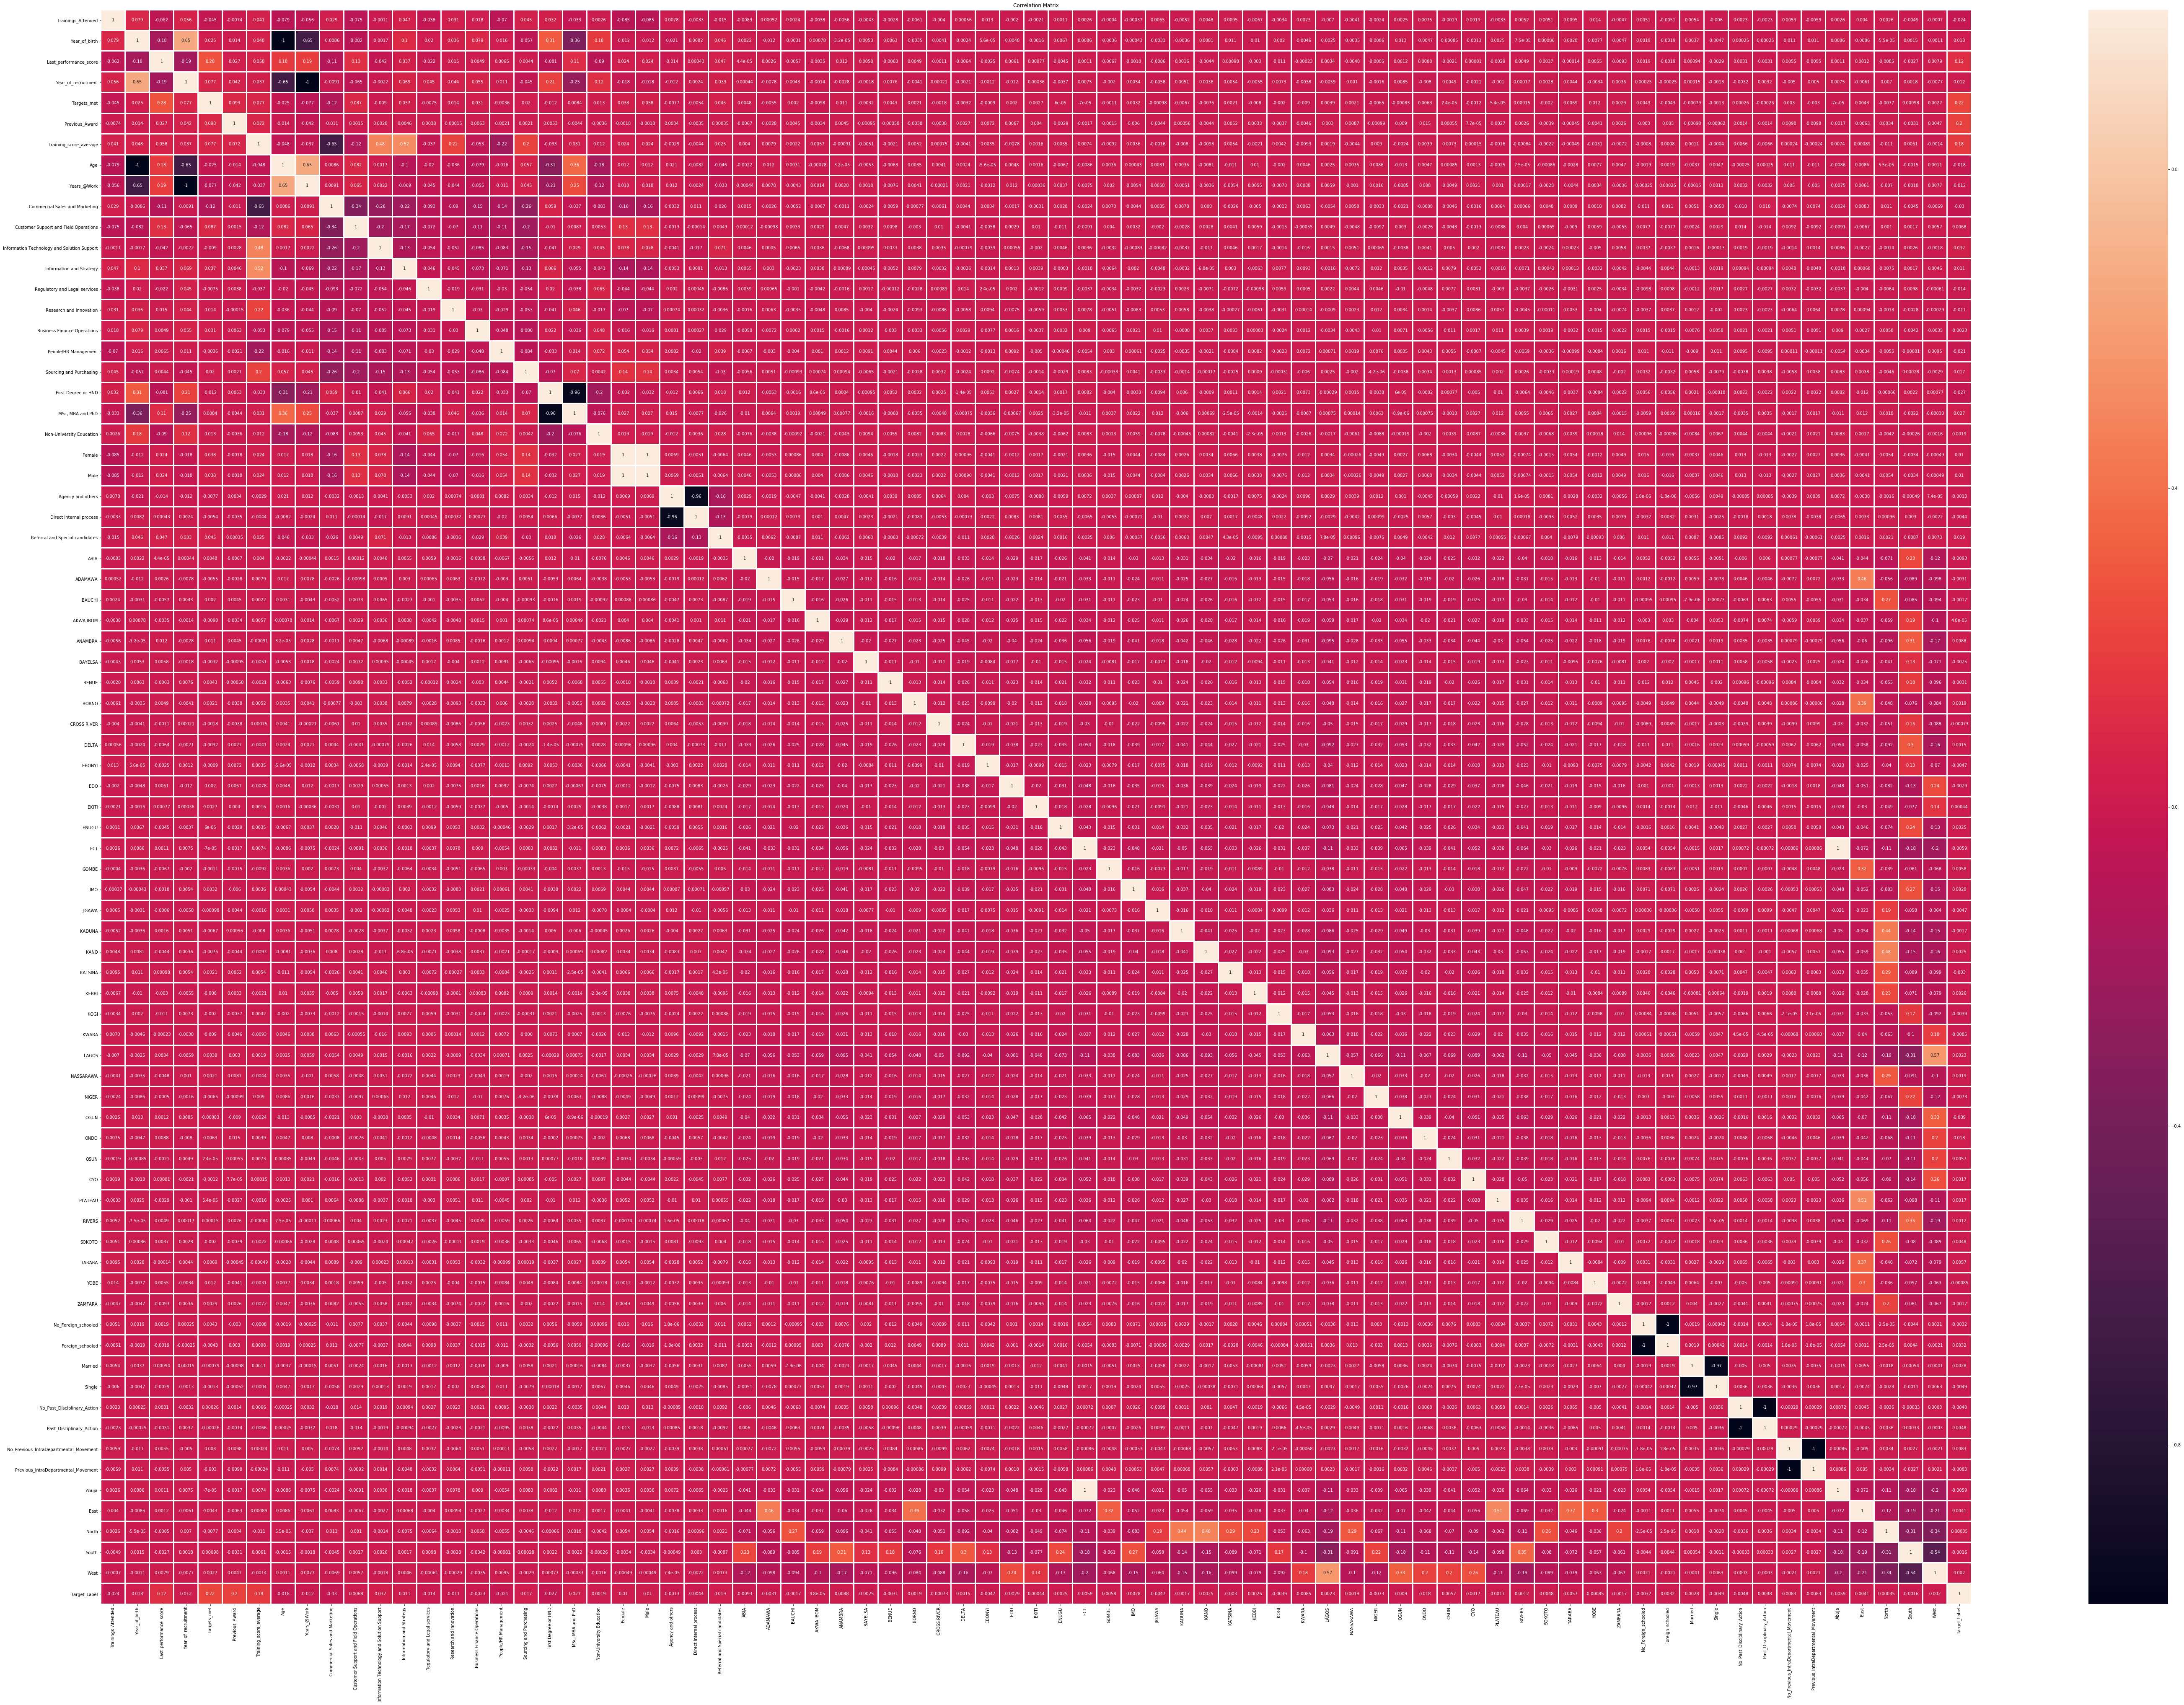

In [83]:

f,ax=plt.subplots(figsize=(100,70))
sns.heatmap(train_data.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 79 columns):
EmployeeNo                                     38312 non-null object
Trainings_Attended                             38312 non-null int64
Year_of_birth                                  38312 non-null int64
Last_performance_score                         38312 non-null float64
Year_of_recruitment                            38312 non-null int64
Targets_met                                    38312 non-null int64
Previous_Award                                 38312 non-null int64
Training_score_average                         38312 non-null int64
No_of_previous_employers                       38312 non-null object
Age                                            38312 non-null int64
Years_@Work                                    38312 non-null int64
Commercial Sales and Marketing                 38312 non-null uint8
Customer Support and Field Operations          38312 non-null uint8
Inf

In [85]:
#train_data['No_of_previous_employers'].head()
train_data['Nofopreviousemployers'] = train_data['No_of_previous_employers']


In [86]:
train_data.head()

,EmployeeNo,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,No_of_previous_employers,Age,...,Past_Disciplinary_Action,No_Previous_IntraDepartmental_Movement,Previous_IntraDepartmental_Movement,Abuja,East,North,South,West,Target_Label,Nofopreviousemployers
0,YAK/S/00001,2,1986,12.5,2011,1,0,41,0,33,...,0,1,0,0,0,0,1,0,0,0
1,YAK/S/00002,2,1991,12.5,2015,0,0,52,0,28,...,0,1,0,0,0,0,1,0,0,0
2,YAK/S/00003,2,1987,7.5,2012,0,0,42,0,32,...,0,1,0,0,0,1,0,0,0,0
3,YAK/S/00004,3,1982,2.5,2009,0,0,42,1,37,...,0,1,0,0,0,0,1,0,0,1
4,YAK/S/00006,3,1990,7.5,2012,0,0,77,1,29,...,0,1,0,0,0,0,1,0,0,1


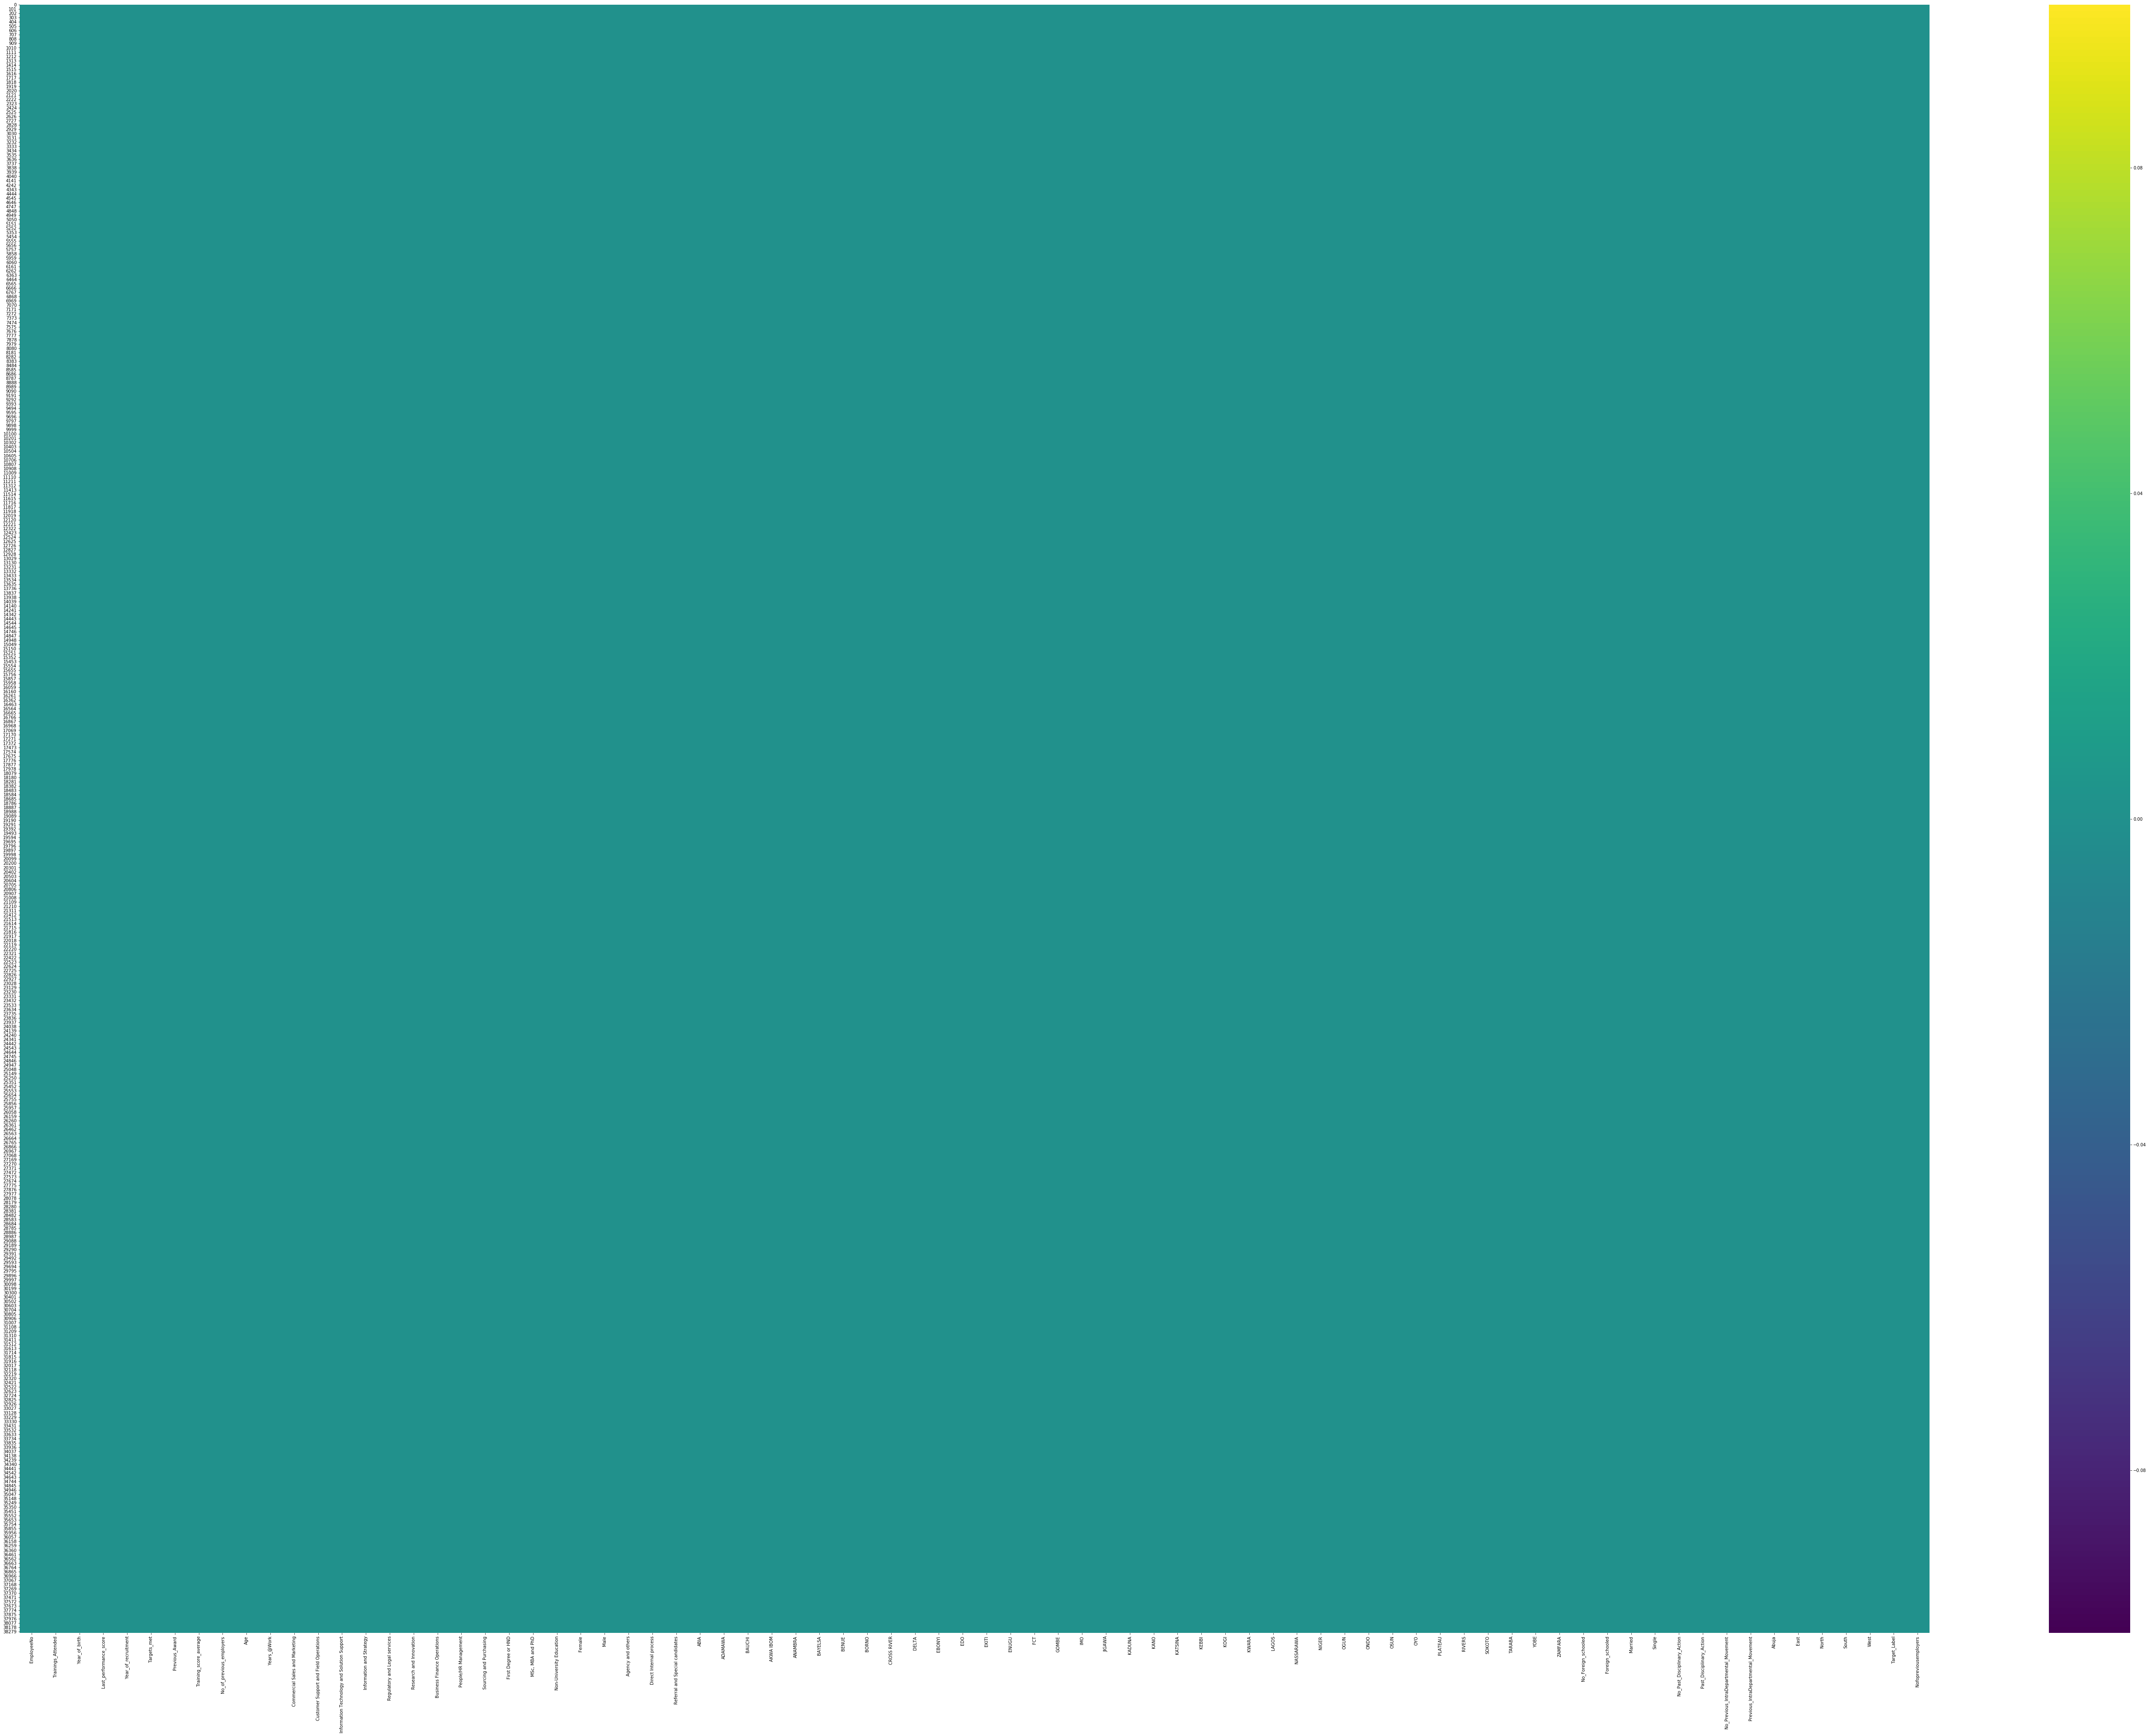

In [87]:
#train_data['No_of_previous_employers'] = train_data['No_of_previous_employers'].astype(np.int)
f,ax=plt.subplots(figsize=(100,70))
sns.heatmap(data = train_data.isnull(), cmap='viridis',ax = ax)

In [88]:
train_data.shape

(38312, 80)

In [89]:
train_data['log_Last_performance_score'] = train_data['Last_performance_score']
train_data['Log_Training_score_average'] = train_data['Training_score_average']

test_data['log_Last_performance_score'] = test_data['Last_performance_score']
test_data['Log_Training_score_average'] = test_data['Training_score_average']

# scafolding  No_of_previous_employers

In [90]:
train_data.drop('No_of_previous_employers',axis = 1, inplace = True)

In [91]:
train_data['target_label'] = train_data['Target_Label']
train_data.drop('Target_Label',axis = 1, inplace =True)

In [92]:
train_data.shape

(38312, 81)

In [93]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Age', 'Years_@Work',
       'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 'KWARA',
       'LAGOS', 'NA

In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 81 columns):
EmployeeNo                                     38312 non-null object
Trainings_Attended                             38312 non-null int64
Year_of_birth                                  38312 non-null int64
Last_performance_score                         38312 non-null float64
Year_of_recruitment                            38312 non-null int64
Targets_met                                    38312 non-null int64
Previous_Award                                 38312 non-null int64
Training_score_average                         38312 non-null int64
Age                                            38312 non-null int64
Years_@Work                                    38312 non-null int64
Commercial Sales and Marketing                 38312 non-null uint8
Customer Support and Field Operations          38312 non-null uint8
Information Technology and Solution Support    38312 non-null uint8
Info

In [95]:
#train_data['Nofopreviousemployers'] = train_data['Nofopreviousemployers'].astype(np.int)
#train_data.Nofopreviousemployers.head(50)
train_data['Nofopreviousemployers'] = train_data['Nofopreviousemployers'].replace(to_replace = 'More than 5', value = 6)
train_data['Nofopreviousemployers'] = pd.to_numeric(train_data['Nofopreviousemployers'])

In [143]:
test_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 

In [144]:
test_data['No_of_previous_employers'] = test_data['No_of_previous_employers'].replace(to_replace = 'More than 5', value = 6)
test_data['No_of_previous_employers'] = pd.to_numeric(test_data['No_of_previous_employers'])

In [96]:
train_data['Nofopreviousemployers'].value_counts()

1    18867
0    13272
2     1918
3     1587
4     1324
5      943
6      401
Name: Nofopreviousemployers, dtype: int64

In [97]:
train_data.shape

(38312, 81)

# Feature Selection

In [98]:
from sklearn.feature_selection import SelectKBest,chi2
'''
Xfeat = train_data.iloc[:,1:79]
Yfeat = train_data.iloc[:,-1] 
'''
#Xfeat = train_data.iloc[:,1:78]
#Yfeat = train_data.iloc[:,-1] 

Xfeat = train_data.iloc[:,1:80]
Yfeat = train_data.iloc[:,-1] 



In [99]:
best_features = SelectKBest(score_func = chi2, k  = 79)
fit_feat = best_features.fit(Xfeat,Yfeat)
feat_score = pd.DataFrame(fit_feat.scores_)
feat_col = pd.DataFrame(Xfeat.columns)
feat_score_data = pd.concat([feat_col,feat_score], axis = 1)
feat_score_data.columns = ['features','score']
feat_score_data

,features,score
0,Trainings_Attended,3.742026
1,Year_of_birth,0.364986
2,Last_performance_score,999.330013
3,Year_of_recruitment,0.052178
4,Targets_met,1249.518420
5,Previous_Award,1518.545947
6,Training_score_average,3934.505005
7,Age,22.108052
8,Years_@Work,17.924287
9,Commercial Sales and Marketing,24.296496


In [100]:
#train_data['No_of_previous_employers'].value_counts()
#feat_score_data.to_csv('featureselection.csv', index=True)

In [101]:
feat_score_data.nlargest(29,columns='score')

,features,score
6,Training_score_average,3934.505005
78,Log_Training_score_average,3934.505005
5,Previous_Award,1518.545947
4,Targets_met,1249.518420
2,Last_performance_score,999.330013
77,log_Last_performance_score,999.330013
11,Information Technology and Solution Support,33.348765
9,Commercial Sales and Marketing,24.296496
7,Age,22.108052
19,"MSc, MBA and PhD",19.699993


In [102]:
selected_features = train_data[['Trainings_Attended','Last_performance_score','Targets_met','Previous_Award',
                               'Information Technology and Solution Support','Commercial Sales and Marketing',
                               'Age','MSc, MBA and PhD','Years_@Work','People/HR Management','Referral and Special candidates',
                               'ONDO','Sourcing and Purchasing','First Degree or HND','Regulatory and Legal services','Research and Innovation',
                               'Information and Strategy','Trainings_Attended','ABIA','Female','Male','OGUN','ANAMBRA',
                               'KWARA','Previous_IntraDepartmental_Movement','log_Last_performance_score',
                               'Log_Training_score_average']]#,'NIGER','Customer Support and Field Operations','GOMBE','FCT']]

In [103]:
test_selected_features = test_data[['Trainings_Attended','Last_performance_score','Targets_met','Previous_Award',
                               'Information Technology and Solution Support','Commercial Sales and Marketing',
                               'Age','MSc, MBA and PhD','Years_@Work','People/HR Management','Referral and Special candidates',
                               'ONDO','Sourcing and Purchasing','First Degree or HND','Regulatory and Legal services','Research and Innovation',
                               'Information and Strategy','Trainings_Attended','ABIA','Female','Male','OGUN','ANAMBRA',
                               'KWARA','Previous_IntraDepartmental_Movement','log_Last_performance_score',
                               'Log_Training_score_average']]

# Ready to train Model

In [104]:


import sklearn 
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.metrics as sklm
from sklearn import linear_model
import numpy.random as nr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
#from sklearn.navie_bayes import GuassianNB 
#import category_encoders as ce
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

In [105]:
# X_data = selected_features
# y_data = train_data['target_label']

In [106]:
train_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'Age', 'Years_@Work',
       'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 'KWARA',
       'LAGOS', 'NA

# select and split data for training 

In [107]:
X_data = train_data.drop(['EmployeeNo','target_label'],axis=1)
y_data = train_data['target_label']

#Given_Test_data = scaler.transform(test_doc)
#test_doc = test_data.drop(['EmployeeNo'],axis=1)

In [145]:
test_doc = test_data.drop(['EmployeeNo'],axis=1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=222)

In [109]:
print('train size is :{}'.format((len(X_train)/len(train_data.index))*100 ))
print('train_test size is :{}'.format((len(X_test)/len(train_data.index))*100))


train size is :69.99895594069743
train_test size is :30.00104405930257


In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#test_doc = scaler.transform(test) 

C:\Users\adede\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\adede\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [111]:
train_data.shape

(38312, 81)

# navie bayes model

In [112]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.4f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
#probabilities = logistic_model.predict_proba(X_test)
#print_metrics(y_test, probabilities, 0.5) 
probabilities = NB.predict_proba(X_test)
print_metrics(y_test, probabilities,0.5)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      8963              1520
Actual negative       627               384

Accuracy        0.8132
AUC             0.68
Macro precision 0.57
Macro recall    0.62
 
           Positive      Negative
Num case    10483          1011
Precision    0.93          0.20
Recall       0.86          0.38
F1           0.89          0.26


#  Logistic model

In [114]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train) 

C:\Users\adede\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [115]:
probabilities = logistic_model.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10429                54
Actual negative       746               265

Accuracy        0.9304
AUC             0.87
Macro precision 0.88
Macro recall    0.63
 
           Positive      Negative
Num case    10483          1011
Precision    0.93          0.83
Recall       0.99          0.26
F1           0.96          0.40


In [116]:
y_pred = logistic_model.predict(X_test)
from sklearn.metrics import accuracy_score
y_pred = logistic_model.predict(X_test)
accuracy_score = accuracy_score(y_test,y_pred)
accuracy_score

0.9303984687663128

In [117]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Random forest ensemble model

In [118]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,y_train)
probabilities = clf.predict_proba(X_test)
print_metrics( y_test, probabilities,0.5 )

C:\Users\adede\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                 Confusion matrix
                 Score positive    Score negative
Actual positive     10433                50
Actual negative       785               226

Accuracy        0.9274
AUC             0.81
Macro precision 0.87
Macro recall    0.61
 
           Positive      Negative
Num case    10483          1011
Precision    0.93          0.82
Recall       1.00          0.22
F1           0.96          0.35


#  GradientBoosting Classifier Model

In [119]:
GBC = GradientBoostingClassifier(max_depth = 5, learning_rate = 0.03)
GBC.fit(X_train,y_train.ravel())
probabilities = GBC.predict_proba(X_test)
print_metrics( y_test, probabilities,0.5 )


                 Confusion matrix
                 Score positive    Score negative
Actual positive     10470                13
Actual negative       754               257

Accuracy        0.9333
AUC             0.89
Macro precision 0.94
Macro recall    0.63
 
           Positive      Negative
Num case    10483          1011
Precision    0.93          0.95
Recall       1.00          0.25
F1           0.96          0.40


# XGBoost Model

In [135]:
import xgboost as xgb
xgb = xgb.XGBClassifier(silent=False, scale_pos_weight=1,
learning_rate=0.01,  eta= 0.001,
                      colsample_bytree = 0.6,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=7000, 
                      reg_alpha = 0.3,
                    eval_metrics = 'rsme',
                        random_state=42,
                      max_depth=10, 
                      gamma=10)
xgb.fit(X_train, y_train)
probabilities = xgb.predict_proba(X_test)
print_metrics( y_test, probabilities,0.5 )

# 'objectives':'binary:logistic',
#            'eval_metrics':'rmse',
#            'eta':0.001,
#            'max_depth':10,
#            'colsample_bytree':0.6,
#            'alpha':0.001,
#            'random_state':42,
#            'silent':True

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10468                15
Actual negative       668               343

Accuracy        0.9406
AUC             0.90
Macro precision 0.95
Macro recall    0.67
 
           Positive      Negative
Num case    10483          1011
Precision    0.94          0.96
Recall       1.00          0.34
F1           0.97          0.50


In [138]:
test_data.columns

Index(['EmployeeNo', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'No_of_previous_employers',
       'Age', 'Years_@Work', 'Commercial Sales and Marketing',
       'Customer Support and Field Operations',
       'Information Technology and Solution Support',
       'Information and Strategy', 'Regulatory and Legal services',
       'Research and Innovation', 'Business Finance Operations',
       'People/HR Management', 'Sourcing and Purchasing',
       'First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education',
       'Female', 'Male', 'Agency and others', 'Direct Internal process',
       'Referral and Special candidates', 'ABIA', 'ADAMAWA', 'BAUCHI',
       'AKWA IBOM', 'ANAMBRA', 'BAYELSA', 'BENUE', 'BORNO', 'CROSS RIVER',
       'DELTA', 'EBONYI', 'EDO', 'EKITI', 'ENUGU', 'FCT', 'GOMBE', 'IMO',
       'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 

In [146]:
# test_doc = scaler.transform(test_data.drop['EmployeeNo'],axis=1)
Given_Test_data = scaler.transform(test_doc)

C:\Users\adede\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


# saving test_data of  XGBoost model

In [148]:
solution = xgb.predict(Given_Test_data)
submit = pd.DataFrame({'EmployeeNo':test_data.EmployeeNo,'Promoted_or_Not':solution})
submit.to_csv('XGB_DSN.csv', index =False)

In [121]:
'''import xgboost as xgb
Xgb = xgb.XGBClassifier( base_score=0.7,booster = 'dart',n_estimators = 3000,
                        max_depth = 8, learning_rate = 0.01, objective = 'binary:logistic',
                        subsample= 0.9, reg_lambda = 0.03)
Xgb.fit(X_train, y_train)
probabilities = xgb.predict_proba(X_test)
print_metric(y_test, probabilities, 0.5)'''

"import xgboost as xgb\nXgb = xgb.XGBClassifier( base_score=0.7,booster = 'dart',n_estimators = 3000,\n                        max_depth = 8, learning_rate = 0.01, objective = 'binary:logistic',\n                        subsample= 0.9, reg_lambda = 0.03)\nXgb.fit(X_train, y_train)\nprobabilities = xgb.predict_proba(X_test)\nprint_metric(y_test, probabilities, 0.5)"

# Light GBM Model

In [122]:
import lightgbm as lgb

In [123]:
Test_x = test_data.drop(['EmployeeNo'], axis=1)

In [124]:
# #X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=222)
# def run_LGB(Train_x, Train_y, X_test, y_test, Test_x): 
#     params={ "objectives":"binary:logistic",
#         "metric" :" rmse",
#         "num_leaves":40,
#         "learning_rate": 0.004,
#         "bagging_fraction": 0.6,
#         "feature_fraction":0.6,
#         "bagging_seed":42,
#         "verbosity":-1,
#         "seed":42
#        }
#     lgb_train = lgb.Dataset(Train_x, label=Train_y)
#     lgb_val = lgb.Dataset(X_test, label=y_test)
#     eval_result ={}
#     model = lgb.train(params,lgb_train,5000,valid_sets=[lgb_train,lgb_val],
#                  early_stopping_rounds=100,
#                  verbose_eval=150)
#                  #evals_result=eval_result)
#     pred_test_y = model.predict_proba(Test_x, num_iteration = model.best_iteration )
#     return pred_test_y, model#, evals_result
# lgb.LGBMClassifier()

In [125]:
# model = lgb.train(params,lgb_train,5000,valid_sets=[lgb_train,lgb_val],
#                  early_stopping_rounds=100,
#                  verbose_eval=150,
#                  evals_result=evals_result)
# pred_test_y = model.predict_proba(X_test, num_iteration = model.best_iteration )
#pred_test, model, evals_result = run_LGB(X_train,y_train,X_test,y_test,Test_x)

In [126]:
import lightgbm as lgb
# params={ "objectives":"binary:logistic",
#         "metric" :" rmse",
#         "num_leaves":40,
#         "learning_rate": 0.004,
#         "bagging_fraction": 0.6,
#         "feature_fraction":0.6,
#         "bagging_seed":42,
#         "verbosity":-1,
#         "seed":42
#        }
lgb = lgb.LGBMClassifier(boosting_type='dart', objectives="binary:logistic",
        metric= "rmse",
        num_leaves=40,
        learning_rate =0.001,
        bagging_fraction=0.6,
        feature_fraction=0.6,
        bagging_seed=42,
        verbosity=-1,
        n_estimators=5000,
        seed=42)
lgb.fit(X_train, y_train)
probabilities = lgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10468                15
Actual negative       724               287

Accuracy        0.9357
AUC             0.90
Macro precision 0.94
Macro recall    0.64
 
           Positive      Negative
Num case    10483          1011
Precision    0.94          0.95
Recall       1.00          0.28
F1           0.97          0.44


In [130]:
# def run_xgb(Train_x, Train_y, X_test, y_test, Test_x):
#     params={'objectives':'binary:logistic',
#            'eval_metrics':'rmse',
#            'eta':0.001,
#            'max_depth':10,
#            'colsample_bytree':0.6,
#            'alpha':0.001,
#            'random_state':42,
#            'silent':True}
#     tr_data = xgb.DMatrix(Train_x,Train_y)
#     va_data = xbg.DMatrix(X_test,y_test)
    
#     watchlist = [(tr_data,'traina'),(va_data,'valid')]
#     model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping=100,verbose_eval =100)
#     dtest = xgb.DMatrix(Test_x)
#     xgb_pred_y = model_xbg.predic(dtest, ntree_limit=model_xgb.best_ntree_limit)
#     return xgb_pred_y, model_xgb
# # xgb.
    

In [149]:
# pred_test_xbg, model_xgb = run_xgb (X_train, y_train, X_test, y_test, Test_x)
# print('XGB training Completed....')

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = lgb.predict(X_test)
# #accuracy_score = accuracy_score(y_test,y_pred)
# print('accuracy_score is %0.4f' % accuracy_score(y_test,y_pred) )
# #Accuracy        
# #print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))

In [ ]:
kkjkguigouigu

# running and saving model test data

In [ ]:
test_doc = scaler.transform(test_selected_features)
solution =lgb.predict(test_doc)
submit = pd.DataFrame({'EmployeeNo':test_data.EmployeeNo, 'Promoted_or_Not':solution})
submit.to_csv('LightGBM_DSN.csv',index = False)

In [ ]:
# import xgboost as xgb
# xgb = xgb.XGBClassifier(silent=False, scale_pos_weight=1,
# learning_rate=0.01,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='binary:logistic', 
#                       n_estimators=1000, 
#                       reg_alpha = 0.3,
#                       max_depth=4, 
#                       gamma=10)
# #%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

# '''xgb.fit(X_train, y_train)
# probabilities = xgb.predict_proba(X_test)
# print_metrics( y_test, probabilities,0.5 )'''

In [ ]:
# eval_set = [(X_train, y_train), (X_test, y_test)]
# eval_metric = ['auc','error']
# # %time xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
# xgb.fit(eval_set, eval_metric)

In [ ]:
# f,ax=plt.subplots(figsize=(18,12))
# sns.distplot(train_data['Log_Training_score_average'], hist = True, kde = True,ax = ax)

In [ ]:
#XBG Classifier( base_score=0.7,booster = 'dart',n_estimators = 3000,max_depth = 8, learning_rate = 0.01, objective = 'binary:logistic')